In [127]:
!pip install opencv-python
!pip install torch

In [128]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import torch
from PIL import Image

In [129]:
!pip list

Package                       Version
----------------------------- ------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites 

## Viewing + Data Preprocessing

### Let's View a T-Rex Image from Our Data

In [130]:
img_ext = ['jpeg', 'jpg,', 'png']

In [131]:
data_dir = '../data-dinos/dinosaurpics_scraped'

In [132]:
for image_class in os.listdir(data_dir):
    print(image_class)

tyrannosaurus-rex
deinonychus
spinosaurus
triceratops
velociraptor
dilophosaurus
stegosaurus
ankylosaurus
pterodactyl
diplodocus


In [133]:
for trex_im in os.listdir(os.path.join(data_dir, 'tyrannosaurus-rex')):
    print(trex_im)

trex_1920b.jpg
01-trex-scotty_publicity_websize-credit--beth-zaiken_3x2.jpg
Yutyrannus2.jpg
170607-t-rex-skin-feature.jpg
t-rex-jurassic-world.jpg
15TREX-superJumbo.jpg
main-qimg-b50abc4e24f76a7ba9c6df8beb2cbdef-lq.jpeg
file-20230330-28-gk7yku.jpg
1640824120-gn89907c-photoarchiveswebexport.jpg
images (4).jpeg
nintchdbpict000021345184.jpg
8.png
images (10).jpeg
9.png
image (8).jpeg
shutterstock_1099958171.jpg
sgy7JqL9RZZvtXkgGhRTRM-320-80.jpg
14.png
28.png
9mDSoUJ1oSSDUx0NixuK3OWhabJ_5sRWZ6kF9oYavpylOs6tlVQItkL6E8ZB.jpeg
New-evidence-reveals-the-real-T--rex-had-feathers-and-massiv.jpg
29.png
15.png
latest.jpeg
17.png
16.png
56a7e69f1a00001001ab15e6.png
5c81951a26289802157a2e89.jpeg
images (11).jpeg
12.png
image (9).jpeg
13.png
images (5).jpeg
39.png
11.png
1580110754-552c3426b464be3c02a9001395c94996bbe6d1641158aaf06.jpeg
10.png
38.png
35.png
21.png
image (7).jpeg
20.png
34.png
Documentary-reveals-what-the-Tyrannosaurus-Rex-really-looked.png
22.png
36.png
image (5).jpeg
57221127_1004.jpg

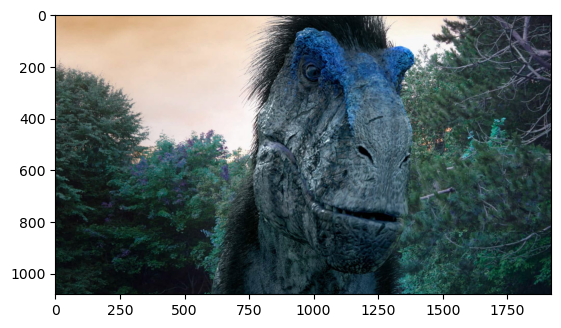

In [134]:
trex_img = cv2.imread(os.path.join(data_dir, 'tyrannosaurus-rex', 'trex_1920b.jpg'))
plt.imshow(trex_img)

### Remove Corrupt Images from Data (Function)

In [144]:
dino_images = []
def correct_img_ext():
    for image_class in os.listdir(data_dir):
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try:
                img = cv2.imread(image_path)
                img_type = imghdr.what(image_path)
                dino_images.append(image_path)
                if img_type not in img_ext:
                    print(f"Image not part of valid image extension: {image_path}")
                    os.remove(image_path)
                if ".ipynb_checkpoints" in image_path:
                    continue
                
            except Exception as e:
                print(f"Some issue with image: {image_path}")
                

correct_img_ext()
dino_images

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Some issue with image: ../data-dinos/dinosaurpics_scraped/ankylosaurus/.ipynb_checkpoints


['../data-dinos/dinosaurpics_scraped/tyrannosaurus-rex/trex_1920b.jpg',
 '../data-dinos/dinosaurpics_scraped/tyrannosaurus-rex/01-trex-scotty_publicity_websize-credit--beth-zaiken_3x2.jpg',
 '../data-dinos/dinosaurpics_scraped/tyrannosaurus-rex/Yutyrannus2.jpg',
 '../data-dinos/dinosaurpics_scraped/tyrannosaurus-rex/170607-t-rex-skin-feature.jpg',
 '../data-dinos/dinosaurpics_scraped/tyrannosaurus-rex/t-rex-jurassic-world.jpg',
 '../data-dinos/dinosaurpics_scraped/tyrannosaurus-rex/15TREX-superJumbo.jpg',
 '../data-dinos/dinosaurpics_scraped/tyrannosaurus-rex/main-qimg-b50abc4e24f76a7ba9c6df8beb2cbdef-lq.jpeg',
 '../data-dinos/dinosaurpics_scraped/tyrannosaurus-rex/file-20230330-28-gk7yku.jpg',
 '../data-dinos/dinosaurpics_scraped/tyrannosaurus-rex/1640824120-gn89907c-photoarchiveswebexport.jpg',
 '../data-dinos/dinosaurpics_scraped/tyrannosaurus-rex/images (4).jpeg',
 '../data-dinos/dinosaurpics_scraped/tyrannosaurus-rex/nintchdbpict000021345184.jpg',
 '../data-dinos/dinosaurpics_scra

### Data Resizing and Grayscaling

In [145]:
# Testing with previous image to resize and grayscale
img = Image.open(os.path.join(data_dir, 'tyrannosaurus-rex', 'trex_1920b.jpg'))
img = img.convert("L")
img = img.resize((250, 250))
numpy_img = np.array(img)
numpy_img
type(img)

PIL.Image.Image

In [146]:
dino_image_df = pd.DataFrame({'image path': dino_images})
dino_image_df

,image path
0,../data-dinos/dinosaurpics_scraped/tyrannosaur...
1,../data-dinos/dinosaurpics_scraped/tyrannosaur...
2,../data-dinos/dinosaurpics_scraped/tyrannosaur...
3,../data-dinos/dinosaurpics_scraped/tyrannosaur...
4,../data-dinos/dinosaurpics_scraped/tyrannosaur...
...,...
558,../data-dinos/dinosaurpics_scraped/diplodocus/...
559,../data-dinos/dinosaurpics_scraped/diplodocus/...
560,../data-dinos/dinosaurpics_scraped/diplodocus/...
561,../data-dinos/dinosaurpics_scraped/diplodocus/...


In [149]:
def image_manipulation():
    dino_species = []
    numpy_images = []
    for image_class in os.listdir(data_dir):
        for image in os.listdir(os.path.join(data_dir, image_class)):
            if ".ipynb_checkpoints" in image:
                continue
            image_path = os.path.join(data_dir, image_class, image)
            dino_species.append(image_class)
            img = Image.open(image_path)
            img = img.convert("L")
            img = img.resize((250, 250))
            numpy_img = np.array(img)
            numpy_images.append(numpy_img)
    
    dino_image_df["species"] = dino_species
    dino_image_df["numpy representation"] = numpy_images

image_manipulation()
dino_image_df

/Users/adrianapsay/anaconda3/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


,image path,species,numpy representation
0,../data-dinos/dinosaurpics_scraped/tyrannosaur...,tyrannosaurus-rex,"[[170, 170, 170, 169, 169, 167, 167, 168, 168,..."
1,../data-dinos/dinosaurpics_scraped/tyrannosaur...,tyrannosaurus-rex,"[[219, 218, 218, 216, 215, 212, 209, 210, 215,..."
2,../data-dinos/dinosaurpics_scraped/tyrannosaur...,tyrannosaurus-rex,"[[254, 254, 254, 254, 254, 254, 254, 254, 254,..."
3,../data-dinos/dinosaurpics_scraped/tyrannosaur...,tyrannosaurus-rex,"[[251, 251, 250, 250, 250, 250, 249, 249, 248,..."
4,../data-dinos/dinosaurpics_scraped/tyrannosaur...,tyrannosaurus-rex,"[[228, 227, 225, 222, 224, 223, 224, 225, 222,..."
...,...,...,...
558,../data-dinos/dinosaurpics_scraped/diplodocus/...,diplodocus,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
559,../data-dinos/dinosaurpics_scraped/diplodocus/...,diplodocus,"[[130, 130, 131, 132, 132, 132, 133, 134, 135,..."
560,../data-dinos/dinosaurpics_scraped/diplodocus/...,diplodocus,"[[182, 101, 42, 56, 68, 84, 103, 167, 123, 98,..."
561,../data-dinos/dinosaurpics_scraped/diplodocus/...,diplodocus,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


(250, 250)


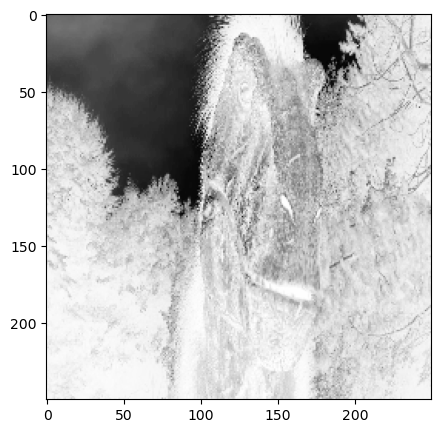

In [106]:
# # Testing with T-Rex Image we Used Earlier (cv2)
# img_gray = cv2.cvtColor(trex_img, cv2.COLOR_BGR2GRAY)
# img_gray_resize = cv2.resize(img_gray, (250, 250))
# fig, ax = plt.subplots(figsize=(5,5))
# ax.imshow(img_gray_resize, "Greys")
# print(img_gray_resize.shape)

In [105]:
import torchvision.transform

ModuleNotFoundError: No module named 'torchvision'